In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the augmented data
augmented_data = pd.read_csv('augmented_dummy_data.csv')

In [3]:
# Separate features and label
X = augmented_data[['Temperatur', 'Kelembaban', 'Ketinggian air']]
y = augmented_data['Kondisi']

In [4]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [5]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Create the ANN model
model_ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Using softmax for 4 classes
])

i:\Projects\monitor_banjir\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model_ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model_ann.fit(X_train_scaled, y_train, epochs=100, batch_size=10, 
                        validation_data=(X_val_scaled, y_val), verbose=2)

Epoch 1/100
147/147 - 1s - 6ms/step - accuracy: 0.6487 - loss: 0.7826 - val_accuracy: 0.8889 - val_loss: 0.4399
Epoch 2/100
147/147 - 0s - 994us/step - accuracy: 0.9183 - loss: 0.3088 - val_accuracy: 0.9333 - val_loss: 0.2236
Epoch 3/100
147/147 - 0s - 987us/step - accuracy: 0.9530 - loss: 0.1900 - val_accuracy: 0.9460 - val_loss: 0.1820
Epoch 4/100
147/147 - 0s - 1ms/step - accuracy: 0.9564 - loss: 0.1618 - val_accuracy: 0.9619 - val_loss: 0.1609
Epoch 5/100
147/147 - 0s - 980us/step - accuracy: 0.9510 - loss: 0.1517 - val_accuracy: 0.9619 - val_loss: 0.1453
Epoch 6/100
147/147 - 0s - 987us/step - accuracy: 0.9619 - loss: 0.1434 - val_accuracy: 0.9683 - val_loss: 0.1354
Epoch 7/100
147/147 - 0s - 987us/step - accuracy: 0.9639 - loss: 0.1366 - val_accuracy: 0.9714 - val_loss: 0.1339
Epoch 8/100
147/147 - 0s - 974us/step - accuracy: 0.9632 - loss: 0.1327 - val_accuracy: 0.9651 - val_loss: 0.1352
Epoch 9/100
147/147 - 0s - 974us/step - accuracy: 0.9598 - loss: 0.1313 - val_accuracy: 0.95

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_ann.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.4f}')

10/10 - 0s - 2ms/step - accuracy: 0.9746 - loss: 0.0925
Test accuracy: 0.9746


In [10]:
# Make predictions
y_pred_ann = np.argmax(model_ann.predict(X_test_scaled), axis=-1)
print("Classification Report:")
print(classification_report(y_test, y_pred_ann))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        98
         1.0       0.97      0.99      0.98        99
         2.0       0.93      0.95      0.94        40
         3.0       0.97      0.96      0.97        78

    accuracy                           0.97       315
   macro avg       0.97      0.97      0.97       315
weighted avg       0.97      0.97      0.97       315



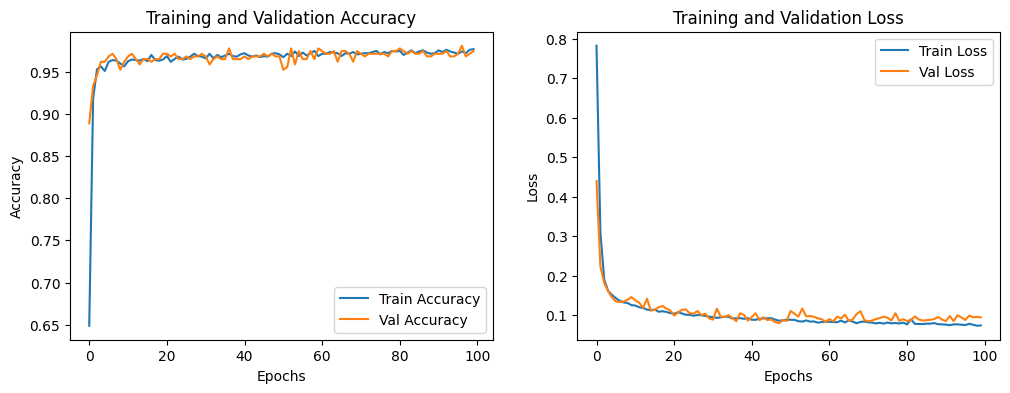

In [11]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

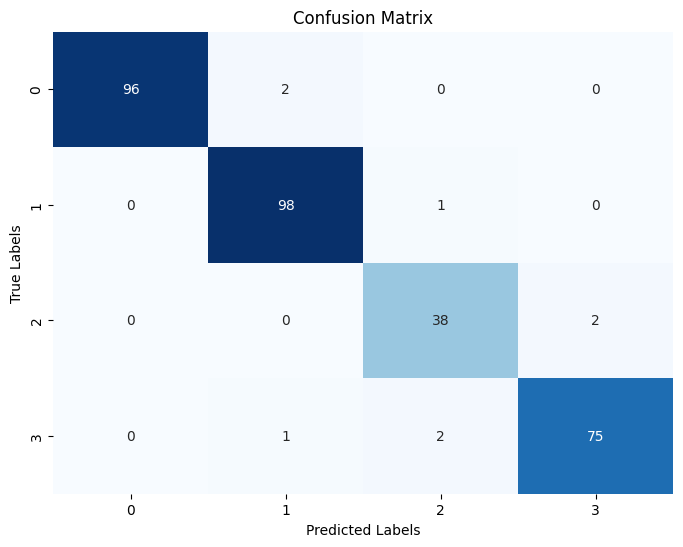

In [12]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define custom input data
# Temp, Hum, Height
custom_input = np.array([[30, 60, 0],  # Example 1
                         [25, 70, 35],  # Example 2
                         [35, 50, 55]]) # Example 3

# Standardize the custom input
scaler = StandardScaler()
custom_input_scaled = scaler.fit_transform(custom_input)

# Make predictions
predictions = np.argmax(model_ann.predict(custom_input_scaled), axis=-1)

# Print predictions
for i, pred in enumerate(predictions):
    print(f'Example {i+1} predicted label: {pred}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Example 1 predicted label: 1
Example 2 predicted label: 0
Example 3 predicted label: 3


In [14]:
# Save the model to a .h5 file
model_ann.save("models/predictor.h5")

In [15]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("models/predictor.h5")

# Use the loaded model for predictions
predictions = np.argmax(loaded_model.predict(custom_input_scaled), axis=-1)

# Print predictions
for i, pred in enumerate(predictions):
    print(f'Example {i+1} predicted label: {pred}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Example 1 predicted label: 1
Example 2 predicted label: 0
Example 3 predicted label: 3


In [16]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model_ann)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Lazuardi\AppData\Local\Temp\tmpwu_4rben\assets


INFO:tensorflow:Assets written to: C:\Users\Lazuardi\AppData\Local\Temp\tmpwu_4rben\assets


: 